In [1]:
!pip install ultralytics


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


# CLI

## Поезд

In [1]:
!yolo detect train data=data.yaml model=yolov8n.pt epochs=15 patience=3 seed=4578 cache=True name=first close_mosaic=5 plots=True

100%|██████████████████████████████████████| 6.25M/6.25M [00:02<00:00, 3.01MB/s]
New https://pypi.org/project/ultralytics/8.3.61 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.59 🚀 Python-3.12.7 torch-2.4.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3050, 7866MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=15, time=None, patience=3, batch=16, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=first, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=4578, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=5, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=F

## Вэл

In [2]:
!yolo val model=runs/detect/first/weights/best.pt data=data.yaml plots=True split=val name=val1

Ultralytics 8.3.59 🚀 Python-3.12.7 torch-2.4.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3050, 7866MiB)
Model summary (fused): 168 layers, 3,015,788 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /home/bob1ch/Рабочий стол/NN-NLP/YOLO_CLI/valid/labels.cache... 40
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all       4000      15159        0.9      0.941      0.959      0.879
                   10c        180        282      0.813      0.926      0.941      0.818
                   10d        188        290      0.856       0.96      0.955      0.824
                   10h        201        322      0.836      0.835      0.914      0.793
                   10s        165        250      0.895      0.917      0.962      0.828
                    2c        193        295      0.979       0.99      0.994      0.925
                    2d        167        259      0.937      0.958      0.988      0.906
                    2h        187      

In [3]:
!yolo val model=runs/detect/first/weights/best.pt data=data.yaml plots=True split=test name=test1

Ultralytics 8.3.59 🚀 Python-3.12.7 torch-2.4.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3050, 7866MiB)
Model summary (fused): 168 layers, 3,015,788 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /home/bob1ch/Рабочий стол/NN-NLP/YOLO_CLI/test/labels.cache... 200
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all       2000       7588      0.911      0.932      0.961      0.881
                   10c         89        137      0.814      0.895      0.906      0.797
                   10d        103        170      0.829      0.941      0.959      0.844
                   10h        100        149      0.857      0.832      0.944      0.821
                   10s         96        151      0.963      0.934      0.986      0.854
                    2c         90        139      0.984      0.993       0.99       0.92
                    2d        101        158      0.968      0.954       0.99       0.91
                    2h        100      

# Python

## Предсказать

In [4]:
import ultralytics
import matplotlib.pyplot as plt

In [5]:
model = ultralytics.YOLO('./runs/detect/first/weights/best.pt')

In [6]:
results = model(['tiny_cards.jpg', 'tiny_cards2.jpg'])


0: 640x480 2 4ds, 2 7cs, 17.2ms
1: 640x480 1 4d, 2 7cs, 17.2ms
Speed: 1.8ms preprocess, 17.2ms inference, 27.7ms postprocess per image at shape (1, 3, 640, 480)


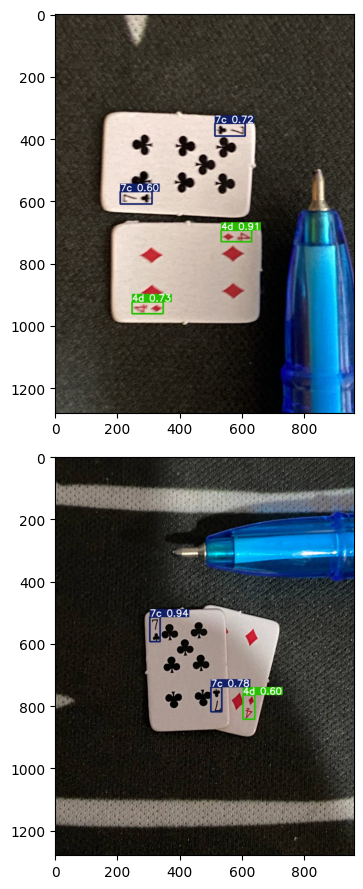

In [7]:
fig, axs = plt.subplots(len(results), 1, figsize=(9, 9))

for ax, result in zip(axs.flatten(), results):
    img_arr = result.plot()[..., ::-1]
    ax.imshow(img_arr)

plt.tight_layout()